In [1]:
import pandas as pd

In [9]:
df= pd.read_csv('train.csv')

### 数据准备

In [11]:
# 转化时间格式，去掉多余列
df['Datetime']=pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M')
df.index=df.Datetime
df.drop(['ID','Datetime'],axis=1,inplace=True)

# 按天采集
df_daily=df.resample('D').sum()
df_daily['ds']=df_daily.index
df_daily['y']=df_daily.Count
df_daily.drop(['Count'],axis=1,inplace=True)
df_daily.head()

### 模型拟合，预测

In [ ]:
from fbprophet import Prophet

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


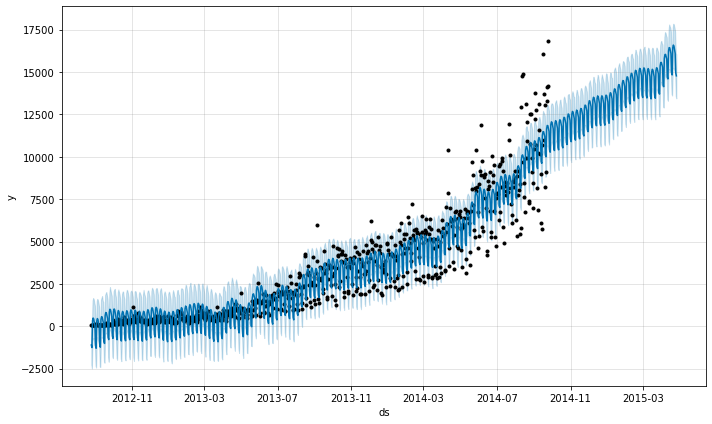

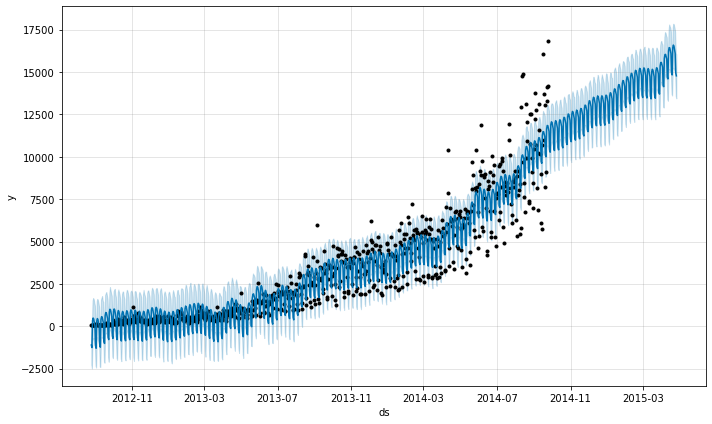

In [28]:
# 拟合prophet模型
m= Prophet(yearly_seasonality=True,seasonality_prior_scale=0.1)
m.fit(df_daily)
# 预测未来7个月 213天
future=m.make_future_dataframe(periods=213)
forecast= m.predict(future)
m.plot(forecast)

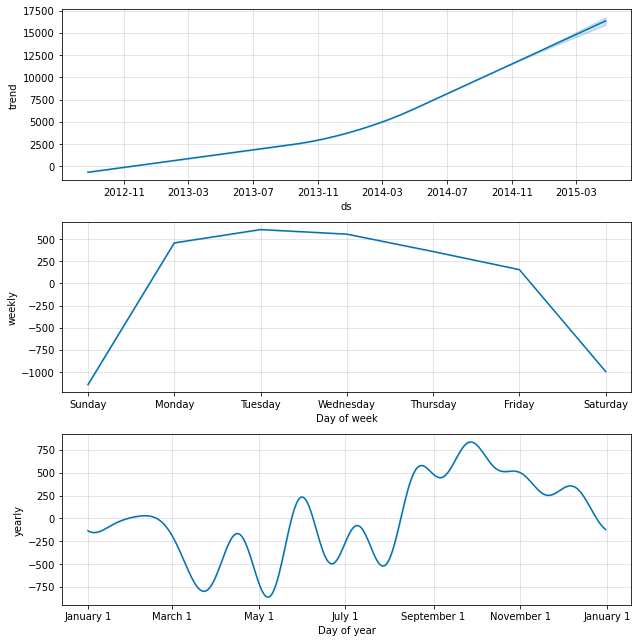

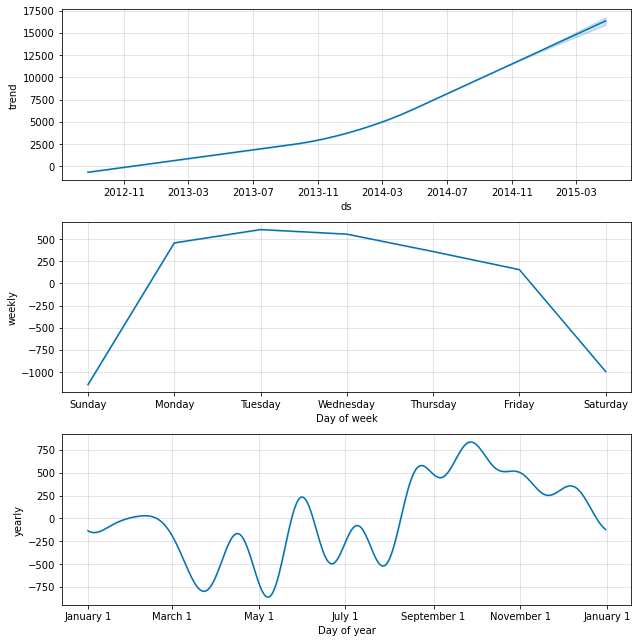

In [27]:
m.plot_components(forecast)